# <center>L2 Computational Physics</center>

## <center>Week 3: Differential Equations I</center>

In [1]:
# usual packages to import
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

In this notebook, you will generate and plot the decay curve for Iodine-133 analytically and numerically. $^{133}\textrm{I}$ has a half life $t_{1/2}$ of 20.8 hours. This means that half of the nuclei will have decayed after time $t_{1/2}$. Derive the mean lifetime $\tau$ from that information.

In [2]:
# define a function to calculate the mean lifetime from the half life
def meanLifetime(halfLife):
    x=halfLife/numpy.log(2)
    return x

T_HALF = 20.8
TAU = meanLifetime(T_HALF)


Check your average lifetime:

In [3]:
# this test is worth 1 mark
assert numpy.isclose(TAU, 30.0080568505)         

### The Decay Equation

Implement the function `f_rad` such that the differential equation 

$$ \frac{dN}{dt} = f_{rad}(N,t)$$

describes the radioactive decay process.

- *Your function should return values using hours as the time unit.*
- *The function should use the constant* `TAU`.

In [4]:
def f_rad(N, t):
    x=-(N/TAU)
    return x
f_rad(1000,6)

-33.3243836807666

Make sure your function works:

In [5]:
# this test cell is worth 1 mark
assert numpy.isclose(f_rad(1000, 0), -33.324383681)           

Solve this first order, ordinary differential equation analytically. Implement this function below, naming it `analytic`. The function should take an initial number of atoms `N0` at time `t=0`, and a time argument. The function should return nuclei count at the time argument. Make sure the function also works for numpy arrays.

In [6]:
def analytic(N0, t):
    return N0*numpy.exp(-t/TAU)
    # YOUR CODE HERE

Check your answer for a single time:

In [7]:
# this test is worth 1 mark
assert numpy.isclose(analytic(1000, 41.6), 250.0)           

In [8]:
# this test is worth 1 mark
assert numpy.isclose(analytic(1000, numpy.arange(0, 60, 6)), 
                     [1000.        ,  818.77471839,  670.39203948,  548.90005334,
                       449.4254866 ,  367.97822623,  301.29126855,  246.68967356,
                       201.983268  ,  165.37879338]).all()


## Numerically Solving the ODE

We now wish to solve our differential equation numerically. We shall do this using Euler's and RK4 methods.

### Euler's Method

Create a function which takes as its arguments the initial number of atoms, `n0`, the initial time `t0`, the time step, `dt`, and the number of steps to perform, `n_steps`.  This function should return an array of the number of counts at each time step using Euler's method. This array should contain the initial and final values, so the array length should be `n_steps+1` 

In [124]:

def solve_euler(f, n0, t0, dt, n_panels):
    number_of_counts=numpy.zeros(n_panels+1)
    number_of_counts[0]=n0
    for i in range(0,n_panels):
        
        number_of_counts[i+1]=number_of_counts[i]+f_rad(number_of_counts[i],t0)*dt
        
        
    
  
    return number_of_counts

print(solve_euler(f_rad, 1000, 0, 1/20, 200))

print(analytic(1000,10))


[1000.          998.33378082  996.67033792  995.00966668  993.35176249
  991.69662072  990.04423679  988.39460609  986.74772403  985.10358605
  983.46218755  981.82352399  980.1875908   978.55438343  976.92389734
  975.29612801  973.67107089  972.04872147  970.42907524  968.8121277
  967.19787435  965.58631069  963.97743226  962.37123457  960.76771316
  959.16686356  957.56868133  955.97316203  954.3803012   952.79009444
  951.2025373   949.61762539  948.03535428  946.45571959  944.87871691
  943.30434187  941.73259008  940.16345717  938.59693878  937.03303055
  935.47172814  933.9130272   932.3569234   930.80341241  929.25248991
  927.70415158  926.15839313  924.61521024  923.07459864  921.53655404
  920.00107215  918.46814872  916.93777947  915.40996015  913.88468651
  912.36195432  910.84175932  909.32409731  907.80896406  906.29635534
  904.78626697  903.27869474  901.77363445  900.27108192  898.77103297
  897.27348343  895.77842914  894.28586594  892.79578967  891.3081962
  889.82

Try your solution:

In [10]:
# this test is worth 1 mark
assert len(solve_euler(f_rad, 1000, 0, 1, 17)) == 18

In [11]:
# this test is worth 2 marks
assert numpy.isclose(solve_euler(f_rad, 1000, 0, 6, 1), [1000.,  800.05369792]).all()

In [12]:
# this test is worth 2 mark
assert numpy.isclose(solve_euler(f_rad, 1000, 0, 6, 10), [1000.        ,  800.05369792,  640.08591955,  512.10310692,
                                                409.7099844 ,  327.7899881 ,  262.24959212,  209.81375595,
                                                167.86227132,  134.29883091,  107.4462763 ]).all()

### RK 4 method

Implement the RK4 method in the `solve_RK4` function. The arguments are the same as for `solve_euler`.

In [90]:
def solve_RK4(f, n0, t0, dt, nsteps):
    number_of_counts=numpy.zeros(nsteps+1)
    number_of_counts[0]=n0
    for i in range(0,nsteps):
        k1=dt*f_rad(number_of_counts[i],t0)
        x=(number_of_counts[i]+k1*(dt/2))
        k2=dt*f_rad(number_of_counts[i]+k1/2,t0)
        y=(number_of_counts[i]+k2*(dt/2))
        k3=dt*f_rad(number_of_counts[i]+k2/2,t0)
        z=(number_of_counts[i]+k2*(dt))
        k4=dt*f_rad(number_of_counts[i]+k3,t0)
        number_of_counts[i+1]= (number_of_counts[i]+1/6*(k1+2*k2+2*k3+k4))
        
        
    
   
    return number_of_counts
print(solve_RK4(f_rad, 1000, 0, 1/2, 17*2))

[1000.          983.47585471  967.22475679  951.24219438  935.52373015
  920.0650001   904.86171236  889.90964596  875.20464967  860.74264088
  846.51960442  832.53159148  818.7747185   805.24516609  791.93917797
  778.85305993  765.9831788   753.32596146  740.87789382  728.63551986
  716.59544066  704.75431348  693.10885081  681.65581946  670.39203965
  659.31438419  648.41977751  637.70519489  627.1676616   616.80425203
  606.61208896  596.58834266  586.73023021  577.03501463  567.50000421]


In [54]:
# This checks that we return an array of the right length
# this test is worth 1 mark
assert len(solve_RK4(f_rad, 1000, 0, 1, 17)) == 18

In [15]:
# This checks that a single step is working
# this test is worth 2 mark
assert numpy.isclose(solve_RK4(f_rad, 1000,0, 6, 1), [1000.,  818.7773]).all()

In [16]:
# This checks multiple steps
# this test is worth 2 marks
assert numpy.isclose(solve_RK4(f_rad, 1000, 0, 6, 10), [
    1000.,
    818.77729521,  
    670.39625915,  
    548.90523578,
    449.43114428,  
    367.9840167,  
    301.29695787,  
    246.69510822, 
    201.98835345,  
    165.3834777,  
    135.41223655]).all()

## Plotting task

**Task 1: **

Create a plot to show that the RK4 method has an error that scales better with the number of steps than the Euler method. (click on the "+" button to create new cells.)       [task worth 5 marks]


Numerical difference between Euler and Analytcial is: [1.10914407 0.24621484 0.10477884 0.05744872 0.03608785 0.02468169
 0.01789293 0.01353312]
Numerical difference between RK4 and Analytcial is: [4.26156735e-03 2.44982230e-04 4.70635838e-05 1.46855907e-05
 5.96525956e-06 2.86081769e-06 1.53807960e-06 8.98913640e-07]
[1 2 3 4 5 6 7 8]


Text(0.5,1,'Error in RK4 compared with error in Euler')

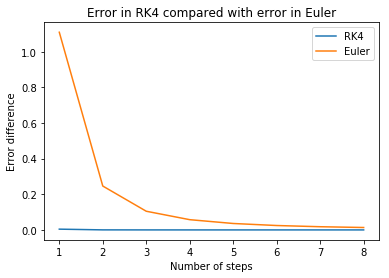

In [161]:
import matplotlib.pyplot as plt
%matplotlib inline
n0=1000
t0=0
dt=6
nsteps=numpy.arange(1,9,1)
lis1=numpy.zeros(len(nsteps))
lis2=numpy.zeros(len(nsteps))
x=numpy.zeros(len(nsteps))
for i in range(len(nsteps)):
    y=solve_RK4(f_rad, n0, t0, dt/nsteps[i], 10*nsteps[i])
    
   
    lis1[i]=numpy.abs(analytic(n0,(dt/nsteps[i])*10*nsteps[i] )-y[10*nsteps[i]])

for i in range(len(nsteps)):
    w=solve_euler(f_rad, n0, t0, dt/nsteps[i], 10*nsteps[i])
   
    lis2[i]=numpy.abs(analytic(n0,(dt/nsteps[i])*10*nsteps[i] )-w[10*nsteps[i]-1])
    
    
x2=solve_RK4(f_rad, n0, t0, dt, len(nsteps)-1)  
z=solve_euler(f_rad, n0, t0, dt, len(nsteps)-1)



print("Numerical difference between Euler and Analytcial is:",lis2)
print("Numerical difference between RK4 and Analytcial is:",lis1)
print(nsteps)
plt.plot(nsteps,lis1)
plt.plot(nsteps,lis2)
plt.xlabel("Number of steps")
plt.ylabel("Error difference")
plt.legend(["RK4","Euler"])

plt.title("Error in RK4 compared with error in Euler")